In [1]:
library(tidyverse);
library(pracma);

── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: 'pracma'


The following object is masked from 'package:purrr':

    cross




In [2]:
# getwd( )
username = unlist(strsplit(dirname("~"), "/"))[3];
root = paste0("/Users/", username, "/workspace/wage-gap");

In [3]:
df = read.csv(paste0(root, "/wage2015_subsample_inference.csv"))
print(paste("Total number of instances in df (unmodified, raw data):", nrow(df)))

[1] "Total number of instances in df (unmodified, raw data): 5150"


In [4]:
df_scl = subset(df, df["scl"] == 1.0, select=colnames(df))

In [5]:
df_clg = subset(df, df["clg"] == 1.0, select=colnames(df))

In [6]:
sample = rbind(df_scl, df_clg)
print(paste("Total number of instances in sample (filtered by (scl or clg == 1)):", nrow(sample)))

[1] "Total number of instances in sample (filtered by (scl or clg == 1)): 3068"


In [7]:
formula_basic = "lwage ~ sex + exp1 + shs + hsg + mw + so + we + occ2 + ind2"
formula_flex = "lwage ~ sex + (exp1 + exp2 + exp3 + exp4 + shs + hsg + occ2 + ind2 + mw + so + we) ** 2"

In [8]:
linear_model_basic = lm(formula_basic, data=sample)
summary(linear_model_basic)


Call:
lm(formula = formula_basic, data = sample)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.87709 -0.33072 -0.01178  0.29595  3.14401 

Coefficients: (2 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.4365746  0.0380123  90.407  < 2e-16 ***
sex         -0.0852733  0.0188515  -4.523 6.32e-06 ***
exp1         0.0070771  0.0008950   7.908 3.63e-15 ***
shs                 NA         NA      NA       NA    
hsg                 NA         NA      NA       NA    
mw          -0.0615643  0.0263310  -2.338   0.0194 *  
so          -0.0313741  0.0258618  -1.213   0.2252    
we           0.0003119  0.0274983   0.011   0.9909    
occ2        -0.0258756  0.0013641 -18.969  < 2e-16 ***
ind2        -0.0131990  0.0017496  -7.544 5.98e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.509 on 3060 degrees of freedom
Multiple R-squared:  0.1282,	Adjusted R-squared:  0.1262 
F

In [9]:
linear_model_flex = lm(formula_flex, data=sample)
summary(linear_model_flex)


Call:
lm(formula = formula_flex, data = sample)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.83777 -0.32134 -0.01873  0.29769  3.04655 

Coefficients: (27 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.615e+00  1.719e-01  21.030  < 2e-16 ***
sex         -8.654e-02  1.890e-02  -4.579 4.87e-06 ***
exp1        -6.338e-02  8.721e-02  -0.727   0.4675    
exp2         1.102e+00  2.014e+00   0.547   0.5844    
exp3        -7.783e-01  2.469e+00  -0.315   0.7526    
exp4         3.078e-01  1.613e+00   0.191   0.8487    
shs                 NA         NA      NA       NA    
hsg                 NA         NA      NA       NA    
occ2        -3.658e-02  7.287e-03  -5.020 5.47e-07 ***
ind2        -1.821e-02  8.953e-03  -2.034   0.0420 *  
mw           1.811e-01  1.363e-01   1.329   0.1839    
so           2.523e-02  1.325e-01   0.190   0.8490    
we           2.555e-02  1.478e-01   0.173   0.8628    
exp1:exp2           

In [10]:
# Graficos estadísticos

In [11]:
coefplot = function(lmb, lmf){
  coefs = c(lmb$coefficients[2], lmf$coefficients[2])
  errors = c(lmb$coefficients[2] - confint(lmb)[2][1],
             lmf$coefficients[2] - confint(lmf)[2][1])
  varname = c("Basic Model", "Flexible Model")
  graph = ggplot() + geom_errorbar(aes(x=varname, y=coefs, ymin=coefs-errors,
                               ymax=coefs+errors), width=.1)
  graph = graph + geom_point(aes(x=varname, y=coefs)) + ylim(-0.13, 0)
  graph = graph + theme(plot.title = element_text(hjust = 0.5),
          axis.text.x = element_text(angle=90, vjust=0.5, hjust=1))
  graph = graph + labs(title="Interval confidence of sex coefficient", x="", y="")
  ggsave(path=paste0(root, "/notebooks"), filename="coefplot_r.png", width=685/96, height=480/96, device='png', dpi=100)
return(graph)
}

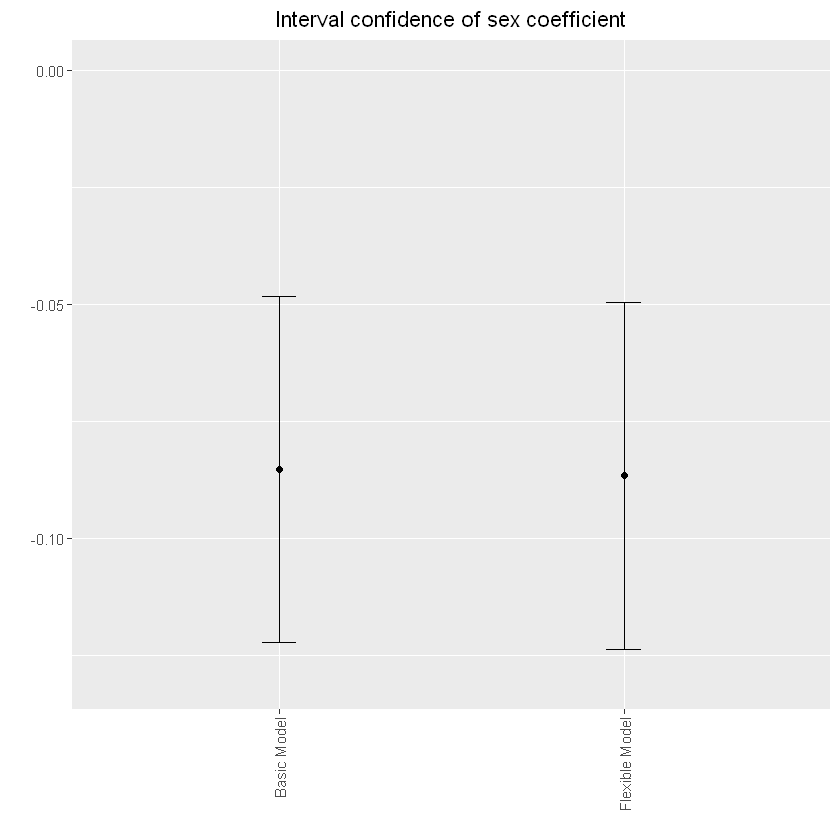

In [12]:
coefplot(linear_model_basic, linear_model_flex)

In [13]:
poly_regression = function(df, degree){
  p = polyfit(df$exp1, df$lwage, 4)
  output = data.frame("x" = df$exp1,
                      "y" = polyval(p, df$exp1))
  return(output)
}

In [14]:
reg_line_scl = poly_regression(df_scl, 4)
reg_line_clg = poly_regression(df_clg, 4)

Warning message:
"Removed 231 rows containing missing values (geom_point)."
Warning message:
"Removed 12 row(s) containing missing values (geom_path)."
Warning message:
"Removed 410 rows containing missing values (geom_point)."
Warning message:
"Removed 231 rows containing missing values (geom_point)."
Warning message:
"Removed 12 row(s) containing missing values (geom_path)."
Warning message:
"Removed 410 rows containing missing values (geom_point)."


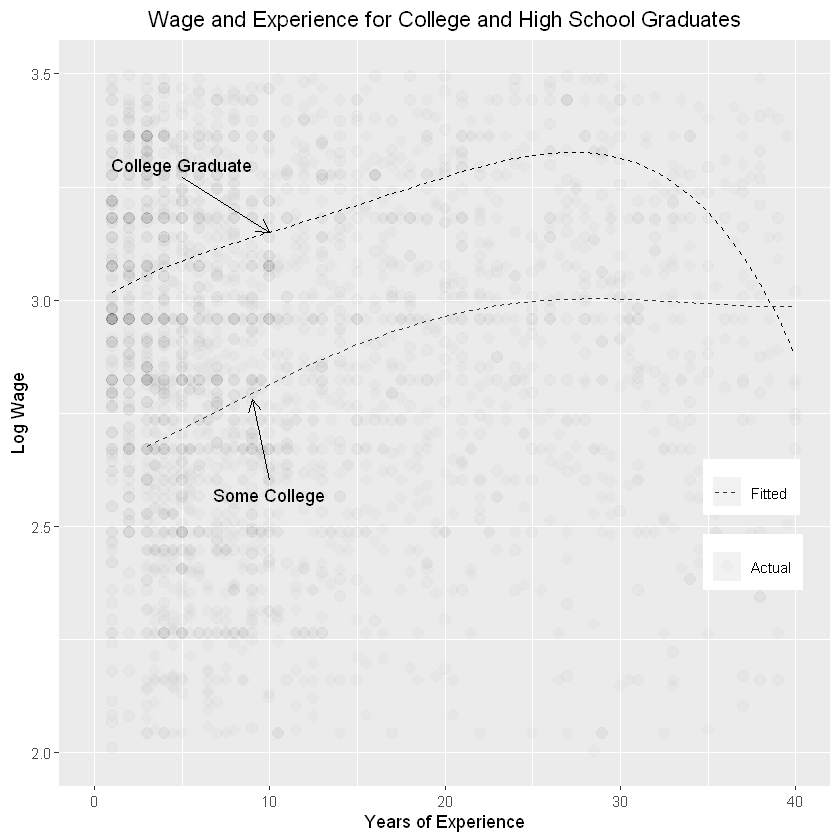

In [15]:
graph = ggplot() + ylim(c(2, 3.5)) + xlim(c(0, 40)) +
          labs(x="Years of Experience", y="Log Wage", title="Wage and Experience for College and High School Graduates") +
          theme(plot.title = element_text(hjust = 0.5))

graph = graph + geom_point(data=df_scl, aes(exp1, lwage, shape="Actual"), fill=rgb(0.9, 0.9, 0.9), alpha=0.02, size=3) +
          geom_line(data=reg_line_scl, aes(x, y, color="Fitted"), linetype="dashed")
graph = graph + geom_point(data=df_clg, aes(exp1, lwage), fill=rgb(0.9, 0.9, 0.9), alpha=0.02, size=3) +
          geom_line(data=reg_line_clg, aes(x, y), linetype="dashed")
graph = graph + geom_segment(aes(x=10, y=2.6, xend=9, yend=2.779), arrow=arrow(length=unit(0.3, "cm")))
graph = graph + geom_segment(aes(x=5, y=3.27, xend=10, yend=3.15), arrow=arrow(length=unit(0.3, "cm")))
graph = graph + annotate("text", x=10, y=2.57, label=sprintf('Some College'))
graph = graph + annotate("text", x=5, y=3.3, label=sprintf('College Graduate'))
graph = graph + scale_color_manual(values=c("Fitted"=rgb(0.2, 0.2, 0.2)))
graph = graph + theme(legend.position=c(0.9, 0.35), legend.title = element_blank())
graph
ggsave(path=paste0(root, "/notebooks"), filename="wageexpforclgandscl_r.png", width=900/96, height=600/96, device='png', dpi=100)
